## Diamond price prediction

I want to attempt to build a model that predicts the price of a diamond. In this challenge, I hope to identify the features that allows me to most accurately predict the price.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [16]:
# Read diamonds.csv and create dataframe
survey = pd.read_csv('diamonds.csv')
survey.head(10)
#print(survey['color'].unique())

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [39]:
# Let's re-format some of the data so we have numerical values for the cut, color, and clarity for comparison purposes.

# First create dictionaries for each column
cut_score = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_score = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_score = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

survey['cut_score'] = survey['cut'].replace(cut_score)
survey['color_score'] = survey['color'].replace(color_score)
survey['clarity_score'] = survey['clarity'].replace(clarity_score)
survey.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut_score,color_score,clarity_score
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,6,2
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,5
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2


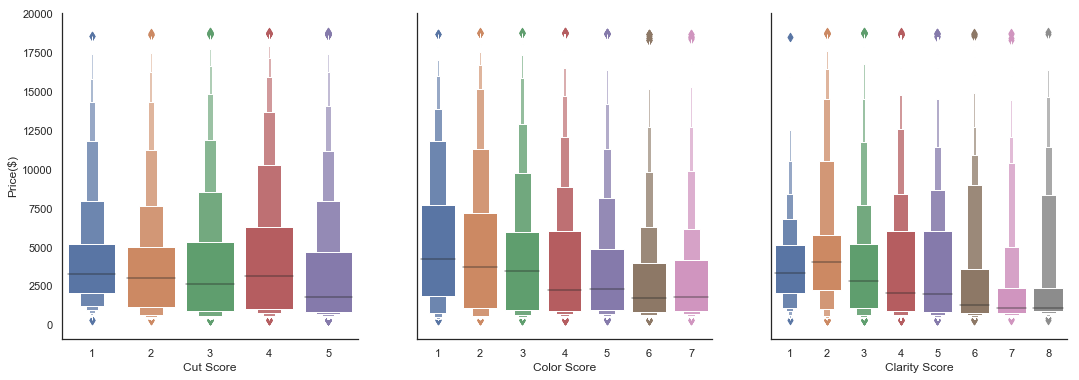

In [56]:
# Now, giving each value a numerical score does help in ordering the variables, but it does little to give context. 
# Does a diamond with a cut score 4 mean it's twice as better as a score 2 diamond? Let's find out.
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.set(style='white')
sns.despine()

y = 'price'

# Boxenplots Price vs. Cut/Color/Clarity scores
ax1 = axes[0]
ax1 = sns.boxenplot('cut_score', y, data=survey, ax=ax1)
ax1.set_xlabel('Cut Score')
ax1.set_ylabel('Price($)')

ax2 = axes[1]
ax2 = sns.boxenplot('color_score', y, data=survey, ax=ax2)
ax2.set_xlabel('Color Score')
ax2.set_ylabel('')

ax3 = axes[2]
ax3 = sns.boxenplot('clarity_score', y, data=survey, ax=ax3)
ax3.set_xlabel('Clarity Score')
ax3.set_ylabel('')

plt.show()

The plots indicate that none of these variables alone are very closely tied to the price of the diamond. Therefore, we can safely assume that the ratio between the scores is okay as is. 

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64


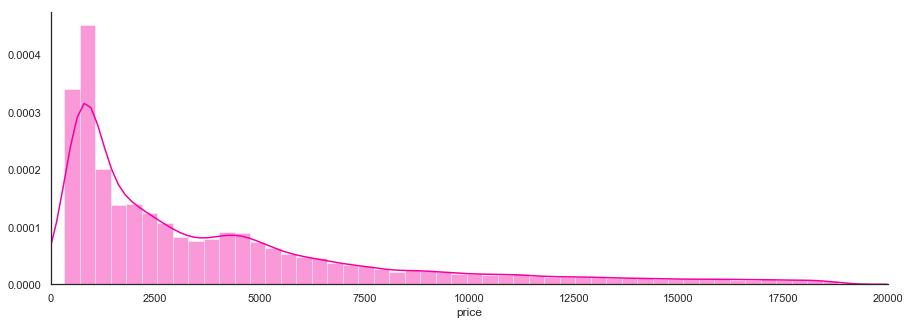

In [74]:
# Let's see how the prices are distributed in our sample
f, ax = plt.subplots(figsize=(15, 5))
sns.set(style='white')
sns.despine()
ax.set_xlim([0, 20000])

sns.distplot(survey['price'], color='#f4009f')

print(survey['price'].describe())
plt.show()

Now, let's compare the variables.

<Figure size 432x288 with 0 Axes>

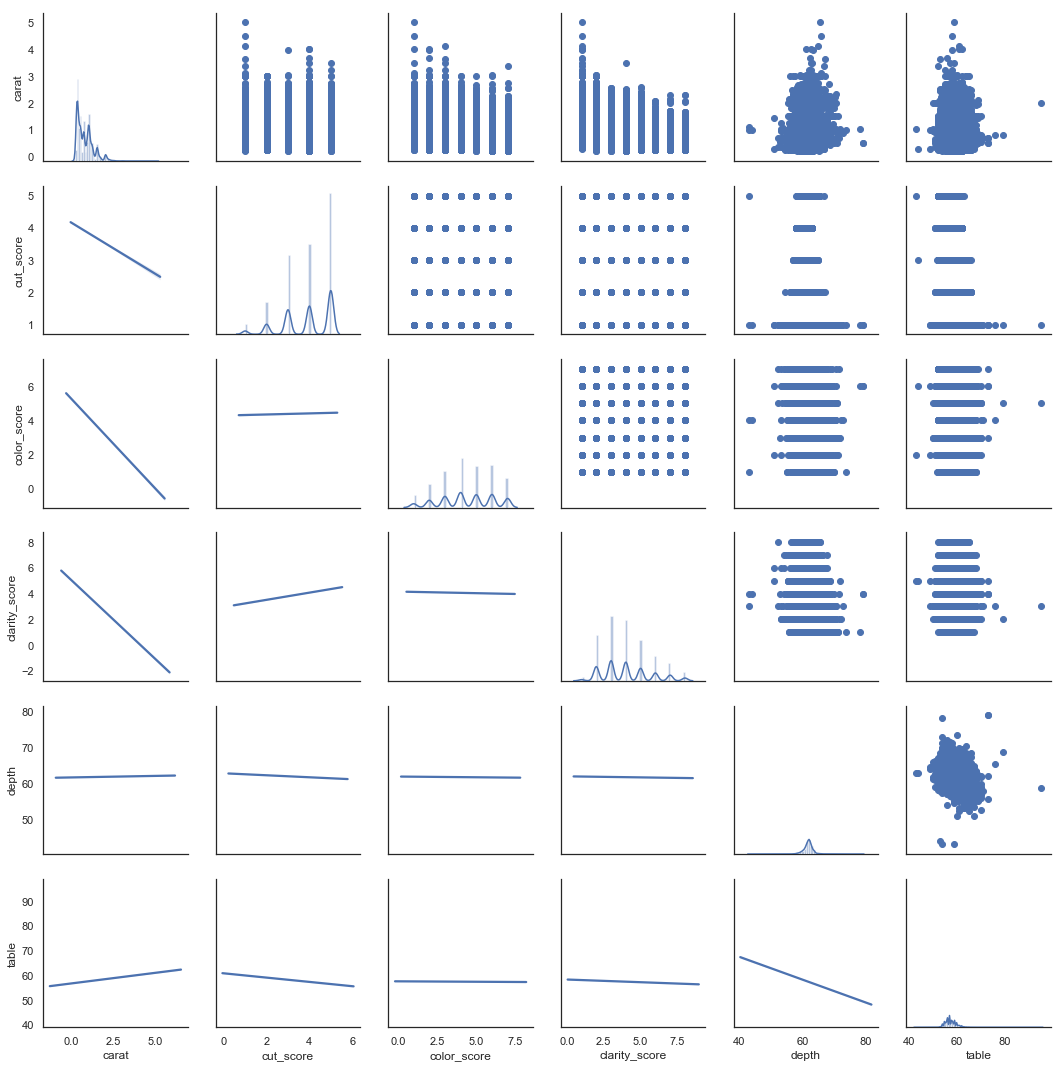

In [100]:
# Let's pull the relevant data from the table and store it
df_features = survey.loc[:, ['carat', 'cut_score', 'color_score', 'clarity_score', 'depth', 'table']]

# Let's plot a matrix
sns.set(style='white')
sns.despine()

g = sns.PairGrid(df_features)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g = g.map_diag(sns.distplot)

plt.show()

                  carat  cut_score  color_score  clarity_score     depth  \
carat          1.000000  -0.134967    -0.291437      -0.352841  0.028224   
cut_score     -0.134967   1.000000     0.020519       0.189175 -0.218055   
color_score   -0.291437   0.020519     1.000000      -0.025631 -0.047279   
clarity_score -0.352841   0.189175    -0.025631       1.000000 -0.067384   
depth          0.028224  -0.218055    -0.047279      -0.067384  1.000000   
table          0.181618  -0.433405    -0.026465      -0.160327 -0.295779   

                  table  
carat          0.181618  
cut_score     -0.433405  
color_score   -0.026465  
clarity_score -0.160327  
depth         -0.295779  
table          1.000000  


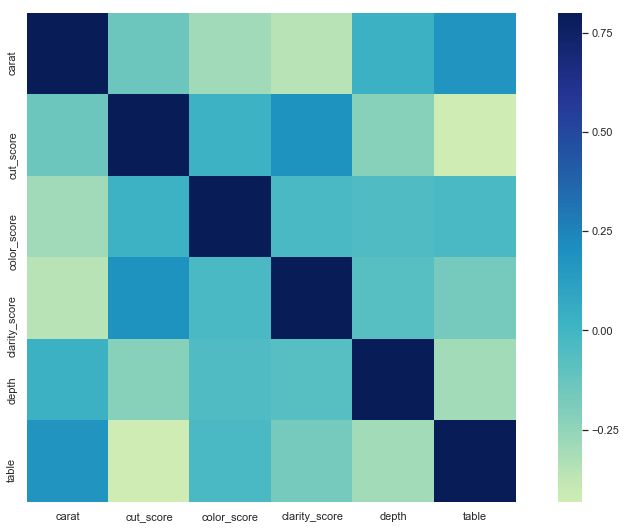

In [106]:
# Correlation matrix
corrmat = df_features.corr()
print(corrmat)

# Plot heatmap
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corrmat, vmax=0.8, center=0, square=True, cmap="YlGnBu")

plt.show()

None of the coefficients are over 0.5 (or -0.5), meaning that these variables are not very closely related and thus not too redundant. They should be considered as separate features.

In [111]:
# Let's take a quick look at whether a change in clarity is a factor in change in price.
stats.ttest_ind(survey[survey['clarity_score'] == 8]['price'], survey[survey['clarity_score'] == 7]['price'])

Ttest_indResult(statistic=3.3480752792252915, pvalue=0.0008192736002341706)

The low p-value indicates that we can reject the null-hypothesis and say that the price difference between the two samples is likely due to the change in clarity score. So we are on the right track.

While we have a features table with all numerical values, we still have an issue of different scales for the different variables. We can fix this by normalizing all the variables to the same scale:

/Users/Sean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


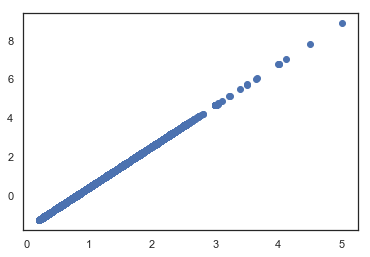

In [114]:
# import package
from sklearn import preprocessing

# We already have a df_features that has all the info we need
names = df_features.columns

# Create scaled_features dataframe
scaled_features = pd.DataFrame(preprocessing.scale(df_features), columns=names)

# Plot original data with scaled data
plt.scatter(df_features['carat'], scaled_features['carat'])
plt.show()

As we expected the scatter plot lines up in a neat diagonal. 

### Features

Carat: Since it is generally known that a larger the diamond, the more expensive.  
Carat * Carat: If carat by itself is significant factor in price, carat * carat might show even stronger relationship  
Cut score: principle measurement of a diamond  
Color score: principle measurement of a diamond  
Clarity score: principle measurement of a diamond
Sum of cut, color, and clarity scores  
Carat * Color score
Carat * Clarity score  
Depth: Principle measurement of a diamond  
Table: Principle measurement of a diamond  

